# Using different input sources

In [1]:
import isolines as il
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
import networkx as nx
from shapely import wkt

## 1. walking isolines from a polygon address

Here, the 1000, 2000, 3000 ft  walk isolines  from Prospect Park, Brooklyn, NYC are calculated.
<ul>
<li>
The units are set to feet (default is meters)
</li>
<li>
The address type is set to 'all' allowing for polygon and line geometries if appropriate
</li>
<li>
The geometry (polygon, multipolygon, linestring, multilinestring) is sampled in evenly spaced intervals (the boundary of polygons or the line itself) and sample points from it are added as nodes in the network, the default interval length is 100 m or 330 ft. - here we keep the default settings
</li>
</ul>

Finished downloading graph from OSM using osmnx, time elapsed: 14.42231035232544 seconds.


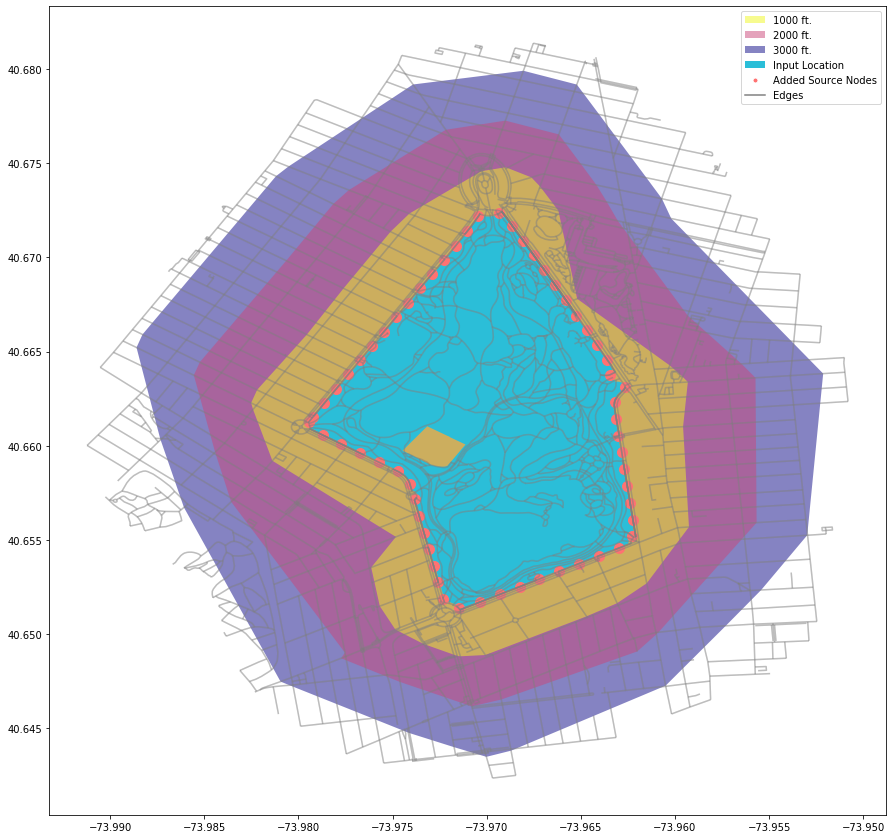

In [4]:
isolines = il.OsmIsolines('Prospect Park, Brooklyn,NYC, USA',
                                 network_type = 'walk',
                                 metric = 'distance',
                                 values=[1000, 2000, 3000],
                                 unit= 'ft',
                                 address_type='all',
           )
isolines.plot_isolines( )

## 2. driving isochrones from an edges geodataframe
#### using a polygon geometry

Here, the 5, 10 and 15 min driving isochrones  from Prospect Park, Brooklyn, NYC are calculated.
<ul>
        <li>
The graph is uploaded from an edges geodataframe uploaded from disk
</li>
    
<li>
The geometry is a shapely golygon object, extracted from the previous example
</li>
<li>
The speed is set to 20 miles per hours (for the driving network type the units are miles per hour if the units are set to feet and kilometers per hour if the units are set to meters)
</li>
    
 <li>
Here we reduce the sample interval of polygon boundary to 1000 ft
</li>

 <li>
The isochrone is set to be convex hull (default for driving network type, the default for walking network type is a concave hull algorithm
</li>

</ul>

In [5]:
## upload an edges geodataframe from disk
edges = gpd.GeoDataFrame.from_file('../data/kings_and_queens_edges.geojson')
## get the shaply polygon geometry from the isolines instance we created in the previous section
poly = isolines.get_location()

In [6]:
edges.head()

,length,oneway,osmid,u,v,geometry
0,170.680,False,5679907,42467330,42510401,"LINESTRING (-73.93367600000001 40.655156, -73...."
1,141.337,False,5679907,42467330,42494695,"LINESTRING (-73.93367600000001 40.655156, -73...."
2,82.098,False,273202152,42467330,42467331,"LINESTRING (-73.93367600000001 40.655156, -73...."
3,82.014,False,273202152,42467330,42467327,"LINESTRING (-73.93367600000001 40.655156, -73...."
4,79.044,False,273202152,42467331,42467333,"LINESTRING (-73.932706 40.655216, -73.931772 4..."


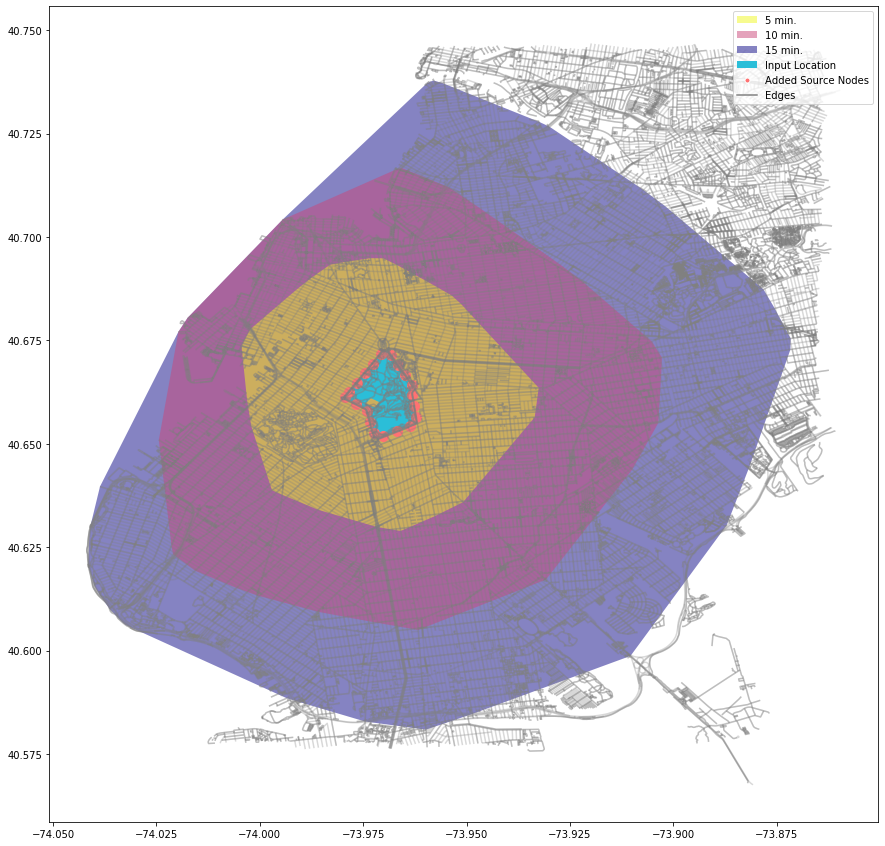

In [13]:
## use GpdIsolines to extract driving isochrones for 5, 10, 15 min. drive in 20 miles per hour 
gdf_drive_isochrones = il.GpdIsolines(poly,
                                edges = edges,
                                 network_type = 'drive',
                                 metric = 'time',
                                 values=[5, 10, 15],
                                speed = 20,
                                 unit= 'ft',
                                convex = True,
                                sample = 1000,
                                fromcol = 'u',
                                tocol = 'v',
                                edge_idcol = 'osmid',
                                weightcol = 'length',
                                onewaycol = 'oneway'
                                 )
gdf_drive_isochrones.plot_isolines()

## 3. walking isolines from a NetworkX graph
#### using a point geometry

Here, the 500, 1000, 5000 ft walking isolines  from Prospect Park, Brooklyn, NYC are calculated.
<ul>
        <li>
A NetworkX graph is uploaded from disk, parsed, and used in the NxIsolines class
</li>
    


</ul>

In [14]:
## upload an edges geodataframe from disk
G = nx.read_graphml('../data/kings_and_queens_edges.graphml')
## preprocess graph geometry - originally in wkt sting format, we here convert it to shaply geometry
## and re-set the geometry attribute on the graph
geom_dict = dict(zip(G.edges, [wkt.loads(x[2]['geometry']) for x in G.edges(data = True)]))
nx.set_edge_attributes(G, name='geometry', values=geom_dict)

## get the shaply polygon geometry from the isolines instance we created in the previous section
point = isolines.get_location().centroid

In [15]:
list(G.edges(data = True))[0]

('42467330',
 '42510401',
 {'weight': 170.68,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fcd9d4d2eb8>,
  'length': 170.68,
  'oneway': False})

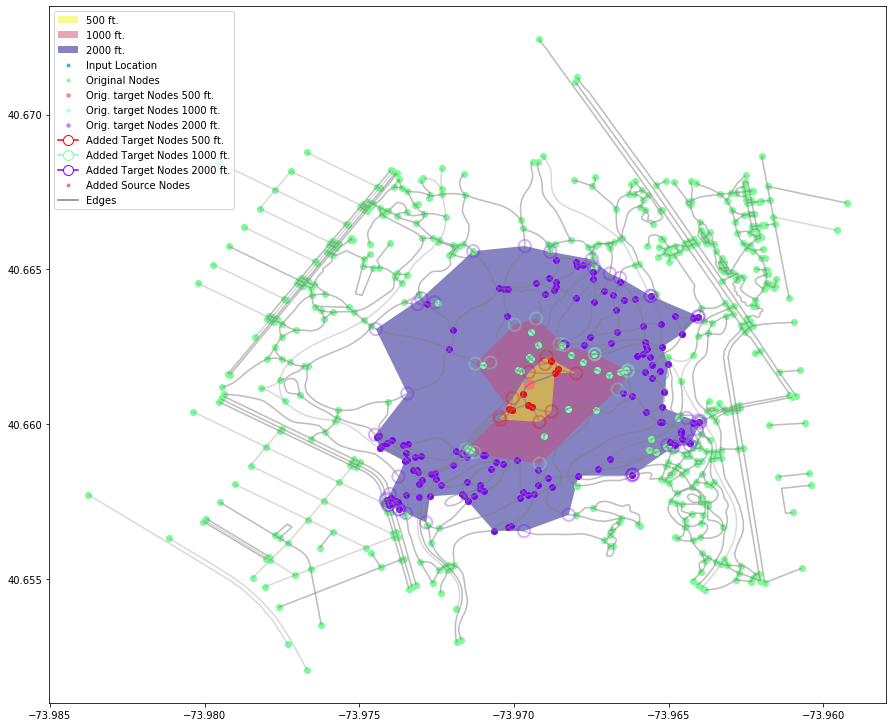

In [16]:
nx_walk_isolines = il.NxIsolines(point,
                                graph = G,
                                 network_type = 'walk',
                                 metric = 'distance',
                                 values=[500, 1000, 2000],
                                 unit= 'ft',
                                 knn = 10,
                                 weightcol = 'length'
                               )

nx_walk_isolines.plot_isolines(plot_nodes = True)
